# Load Dataset

In [1]:
!gdown --fuzzy 'https://drive.google.com/file/d/1J16ocPc0k6MfvXZYG3Cw42L3wetw0a0l/view?usp=sharing'

Downloading...
From: https://drive.google.com/uc?id=1J16ocPc0k6MfvXZYG3Cw42L3wetw0a0l
To: /content/diabetes_prediction_dataset.csv.zip
100% 751k/751k [00:00<00:00, 75.7MB/s]


In [2]:
import zipfile

zip_file_path = 'diabetes_prediction_dataset.csv.zip'
extract_to = 'dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete.")

Extraction complete.


In [4]:
import pandas as pd
import numpy as np

file_path = 'dataset/diabetes_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Data Understanding

In [5]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Melihat nilai unik pada kolom Smoking history

In [7]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

Melihat Seberapa banyak nilai female dan male pada kolom gender





In [8]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Melihat berapa banyak wanita dan pria yang terkena diabetes dan di simpan pada variabel grouped_data dalam bentuk dataframe

In [9]:
grouped_data = df[df['diabetes'] == 1].groupby('gender').size().reset_index(name = 'count')
grouped_data

,gender,count
0,Female,4461
1,Male,4039


Membuat visualisasi data dari jumlah wanita dan pria yang terkena diabetes menggunakan matplotlib dalam bentuk bar diagram

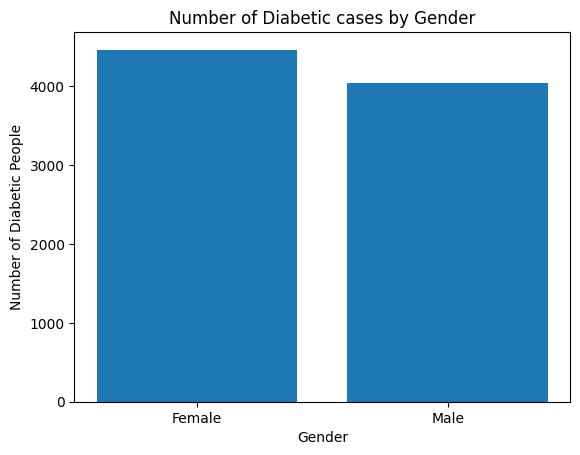

In [10]:
# Bar diagram to see how many people got diabetic group by gender
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.bar(grouped_data['gender'], grouped_data['count'])
plt.title('Number of Diabetic cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Diabetic People')
plt.show()

Menvisualisasikan data orang yang terkena diabetes dan tidak dari dataset kita

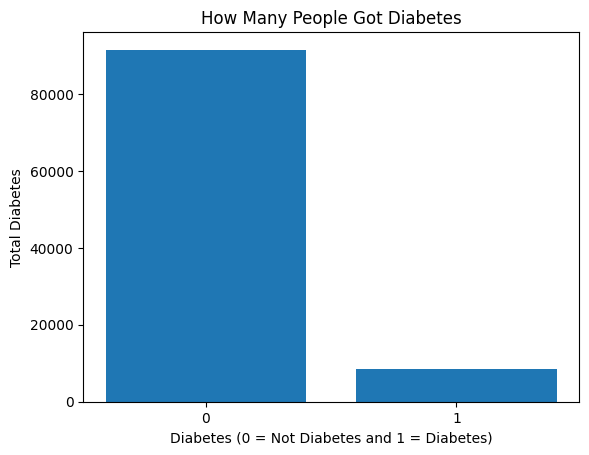

In [11]:
# Bar chart to see how many people got dibetes
diabetes_counts = df['diabetes'].value_counts()

plt.bar(diabetes_counts.index, diabetes_counts.values)
plt.title('How Many People Got Diabetes')
plt.xlabel('Diabetes (0 = Not Diabetes and 1 = Diabetes)')
plt.ylabel('Total Diabetes')
plt.xticks([0, 1])

plt.show()

Melihat korelasi antar semua kolom dengan heatmap tetapi yang jadi fokus utama adalah korelasi setiap kolom dengan kolom diabetes

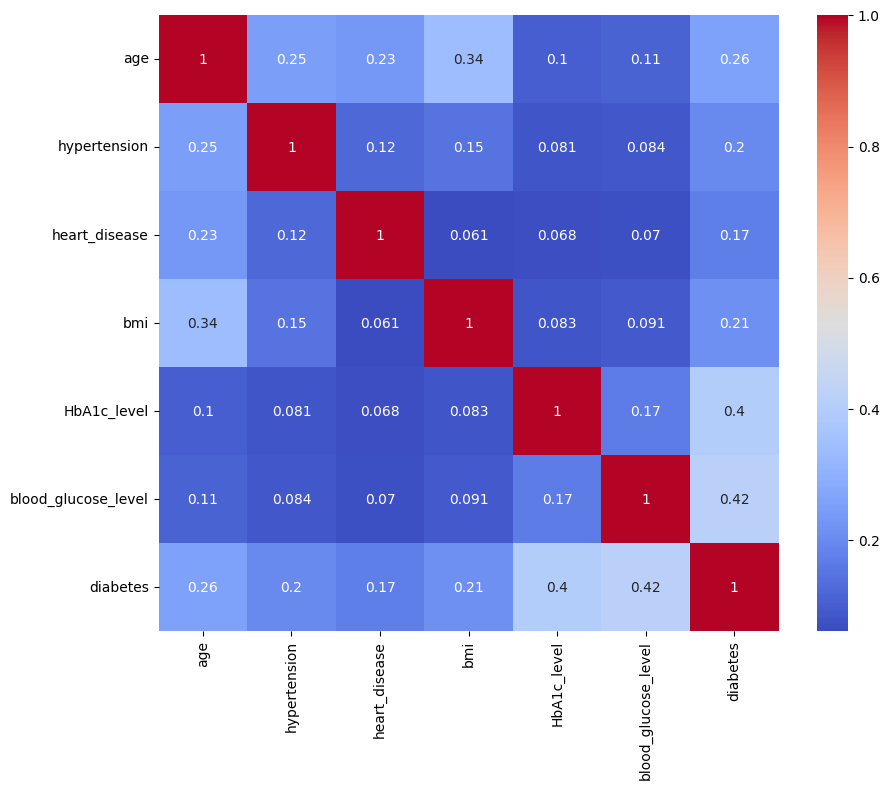

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe to include only numerical columns
numerical_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [13]:
# Filter the dataframe to include only numerical columns
numerical_df = df.select_dtypes(include=[float, int])

# Compute the correlation with 'diabetes' column
correlation_with_diabetes = numerical_df.corrwith(df['diabetes']).sort_values(ascending=False)

print(correlation_with_diabetes)


diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
dtype: float64


# Data Preprocessing

**Melakukan LabelEncoder**

1. mengubah data kolom gender yang mana female menjadi 0 dan male menjadi 1.
2. mengubah data kolom smoking history  


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'],df['smoking_history'] = le.fit_transform(df['gender']),  le.fit_transform(df['smoking_history'])

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


Jika ingin membalikan nilainya yang sudah di label encoder

In [ ]:
from copy import copy

df_baru = copy(df)

df_baru['smoking_history'] = le.inverse_transform(df['smoking_history'])

In [ ]:
df_baru

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


Disini kita membagi data set menjadi 2 variabel yaitu X dan y yang dimana varibel X berisi data kolom selain kolom target (diabetes) dan kolom target disimpan kedalam variabel y

In [ ]:
# Define X and y
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

Mencari model yang paling baik untuk dapat kita gunakan dalam memprediksi dataset diabetes dengan cara membagi variabel X menjadi 2 yaitu X_train dan juga X_test begitu juga variabel y.

Nanti mesin akan berlatih menggunakan X_train dan juga y_train lalu mesin akan mencoba melakukan prediksi terhadap X_test dan selanjutnya hasil prediksi disimpan pada variabel y_pred dan akan di cocokkan dengan variabel y_test.

In [ ]:
# We use StratifiedKFold to see which model is good to use for prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Define the number of splits and create a StratifiedKFold object
n_splits = 5  # You can adjust this as needed
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'SVM Classifier': SVC(),
    'KNN Classifier': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier()
}

# Loop through each classifier and perform cross-validation
for classifier_name, classifier in classifiers.items():
    print(f"Classifier: {classifier_name}")
    accuracy_scores = []

    # Loop through the folds
    for train_index, test_index in stratified_kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the classifier on the training data
        classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = classifier.predict(X_test)

        # Calculate and store accuracy for this fold
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Calculate and print the mean accuracy across all folds for this classifier
    mean_accuracy = np.mean(accuracy_scores)
    print(f'Mean Accuracy: {mean_accuracy:.2f}\n')


Classifier: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Accuracy: 0.95

Classifier: Decision Tree Classifier
Mean Accuracy: 0.95

Classifier: Random Forest Classifier
Mean Accuracy: 0.97

Classifier: SVM Classifier
Mean Accuracy: 0.95

Classifier: KNN Classifier
Mean Accuracy: 0.95

Classifier: XGBoost
Mean Accuracy: 0.97

Classifier: LGBM
[LightGBM] [Info] Number of positive: 6800, number of negative: 73200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 6800, number of negative: 73200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008855 seconds.
You can set `force_col_wise=true` to remove 

Membagi data sama rata menggunakan StratifiedShuffleSplit menjadi X_train, X_test, y_train, y_test

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

shuffel = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)

for train_index, test_index in shuffel.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_scale_train = ss.fit_transform(X_train)
X_scale_test = ss.transform(X_test)


# Model Training

Kita menggunakan RandomForest untuk melakukan prediksi karena menurut hasil prediksi diatas model random forest memiliki tingkat akurasi yang cukup tinggi.

In [ ]:
# Predict Before Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.97055

In [ ]:
# Predict Before Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_scale_train, y_train)
y_pred = model.predict(X_scale_test)

accuracy_score(y_test, y_pred)

0.9705

Melakukan Tuning Hiperparametrik untuk menentukan parameter yang dapat menghasilkan prediksi yang paling tinggi dengan cara kita menentukan parameter yang ingin diuji oleh mesin. Parameter akan dicoba satu-satu untuk melihat parameter mana yang dapat memprediksi lebih baik.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.9718875


In [ ]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(max_features='auto', min_samples_leaf=4,
                       min_samples_split=10)

In [ ]:
y_pred = final_model.predict(X_test)

Akurasi setelah kita lakukan tuning hiperparameter, terlihat bahwa akurasi meningkat.

In [ ]:
accuracy_score(y_test, y_pred)

0.97245

In [ ]:
final_prediction = pd.DataFrame(y_test)

In [ ]:
final_prediction['Hasil Prediksi'] = y_pred

Membandingkan hasil prediksi model dengan data diabetes aslinya, masih terdapat beberapa miss prediksi tetapi hanya sekitar 0.3%

In [ ]:
final_prediction

,diabetes,Hasil Prediksi
43218,0,0
55767,0,0
14426,0,0
31806,0,0
73116,0,0
...,...,...
32795,0,0
75998,0,0
86777,0,0
30426,0,0


In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


Mengimport model yang sudah kita latih.

In [ ]:
from joblib import dump, load
dump(final_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

Melakukan prediksi dengan model yang sudah kita latih

In [ ]:
input_data = (1,	50.0,	0,	0,	3,	37.16,	9.0,	159	)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = final_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
